In [5]:
%run 'malaria_functions.ipynb'

from __future__ import absolute_import, division, print_function, unicode_literals
import os
import sys
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

/Users/angela/virtualenvs/malaria/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
#Loading data with compounds IDs, SMILES and information about their activity
osm_list = reading_csv()
osm_cleaned = data_preproc(osm_list)
osm_cleaned = osm_cleaned.reset_index(drop=True)
#Getting fingerprints descriptors
#osm_fp = fingerprint_desc(osm_cleaned)
#osm_sp = spectrophores(osm_cleaned)
#merging descriptors
#fp_sp = merge_dfs(osm_fp, osm_sp)
#fp_sp.info()

Number of instances of each level of ION_ACTIVITY 
 0.0    395
1.0     55
0.5      5
Name: ION_ACTIVITY, dtype: int64


In [7]:
osm_cleaned.head()

,ID,SMILES,ION_ACTIVITY,TEST_SET,PvsP,pEC50
0,OSM-S-175,O=C(NC1=CC=NC(C(F)(F)F)=C1)C2=CN=CC3=NN=C(C4=C...,1.0,B,0.3475,-0.459045
1,OSM-S-177,O=C(N1CC(C=CC=C2)=C2C1)C3=CN=CC4=NN=C(C5=CC=C(...,0.0,A,10.0000,1.000000
2,OSM-S-201,O=C(NC1=C(C)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,0.0,B,4.5956,0.662342
3,OSM-S-202,c1ncc2n(c1C(Nc1cccc(c1)Cl)=O)c(nn2)c1ccc(cc1)O...,1.0,A,0.2110,-0.675718
4,OSM-S-204,O=C(NC1=C(F)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,0.5,B,0.9018,-0.044890


In [8]:
#Getting fingerprints descriptors
osm_fp = fingerprint_desc(osm_cleaned)
osm_sp = spectrophores(osm_cleaned)

In [9]:
osm_fp.head()

,ION_ACTIVITY,SMILES,ecfp6,fcfp6,hashap,hashtt,rdk7
0,1.0,O=C(NC1=CC=NC(C(F)(F)F)=C1)C2=CN=CC3=NN=C(C4=C...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,0.0,O=C(N1CC(C=CC=C2)=C2C1)C3=CN=CC4=NN=C(C5=CC=C(...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,0.0,O=C(NC1=C(C)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
3,1.0,c1ncc2n(c1C(Nc1cccc(c1)Cl)=O)c(nn2)c1ccc(cc1)O...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
4,0.5,O=C(NC1=C(F)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [ ]:
osm_sp.head()

In [11]:
osm_fpi = fp_individual(osm_fp)
osm_fpi = quitar_fps(osm_fpi)

In [12]:
osm_fpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Columns: 5122 entries, ION_ACTIVITY to fcfp6_125
dtypes: float64(5121), object(1)
memory usage: 17.8+ MB


In [13]:
fp_sp = merge_dfs(osm_fpi, osm_sp)
#fp_sp = fp_sp.drop(['MOLECULES'], axis=1)
fp_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 0 to 454
Columns: 5171 entries, ION_ACTIVITY to MOLECULES
dtypes: float64(5169), object(2)
memory usage: 18.0+ MB


In [14]:
#Converting dataframe to ndarray
npdesc, nplab = df_to_ndarrays(fp_sp)

In [15]:
npdesc

array([[ 1.        ,  1.        ,  1.        , ...,  0.01135379,
        -0.29879663,  1.07779989],
       [ 1.        ,  1.        ,  1.        , ...,  0.9872024 ,
         1.27583598,  0.59825793],
       [ 1.        ,  1.        ,  1.        , ...,  0.52936999,
         0.64136517,  0.89718139],
       ..., 
       [ 1.        ,  1.        ,  1.        , ...,  0.28277928,
         0.48250856,  0.77277017],
       [ 1.        ,  1.        ,  1.        , ...,  0.76764114,
         1.31346701,  0.37976007],
       [ 1.        ,  1.        ,  0.        , ..., -0.48640204,
        -0.10820516,  0.78726975]])

In [16]:
# Scaling data
npdesc = preprocessing.scale(npdesc)

In [20]:
npdesc

array([[ 0.75724935,  0.87843813,  0.39223227, ...,  0.02699891,
        -0.36755395,  1.08534768],
       [ 0.75724935,  0.87843813,  0.39223227, ...,  1.99438687,
         1.53755966, -0.22524038],
       [ 0.75724935,  0.87843813,  0.39223227, ...,  1.07136054,
         0.76992728,  0.59171737],
       ..., 
       [ 0.75724935,  0.87843813,  0.39223227, ...,  0.57421418,
         0.57773014,  0.25170152],
       [ 0.75724935,  0.87843813,  0.39223227, ...,  1.55173401,
         1.58308862, -0.822395  ],
       [ 0.75724935,  0.87843813, -2.54950976, ..., -0.97651619,
        -0.13696149,  0.29132887]])

In [21]:
x_train_s, x_test, y_train_s, y_test = splitting_data(npdesc, nplab, 0.3)
print("Training dataset shape {}".format(Counter(y_train_s)))
print("Test dataset shape {}".format(Counter(y_test)))

Training dataset shape Counter({0.0: 281, 1.0: 34})
Test dataset shape Counter({0.0: 114, 1.0: 21})


In [23]:
optim_model = xgboost_tuning(x_train_s, y_train_s, 281/34)

/Users/angela/virtualenvs/malaria/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.93671, std: 0.01047, params: {u'max_depth': 3, u'min_child_weight': 1}, mean: 0.93135, std: 0.02505, params: {u'max_depth': 3, u'min_child_weight': 3}, mean: 0.92761, std: 0.02471, params: {u'max_depth': 3, u'min_child_weight': 5}, mean: 0.93669, std: 0.01836, params: {u'max_depth': 5, u'min_child_weight': 1}, mean: 0.92833, std: 0.02671, params: {u'max_depth': 5, u'min_child_weight': 3}, mean: 0.92979, std: 0.03123, params: {u'max_depth': 5, u'min_child_weight': 5}, mean: 0.94042, std: 0.01447, params: {u'max_depth': 7, u'min_child_weight': 1}, mean: 0.93026, std: 0.02754, params: {u'max_depth': 7, u'min_child_weight': 3}, mean: 0.92979, std: 0.03123, params: {u'max_depth': 7, u'min_child_weight': 5}, mean: 0.94042, std: 0.01447, params: {u'max_depth': 9, u'min_child_weight': 1}, mean: 0.93026, std: 0.02754, params: {u'max_depth': 9, u'min_child_weight': 3}, mean: 0.92979, std: 0.03123, params: {u'max_depth': 9, u'min_child_weight': 5}] {u'max_depth': 7, u'min_child_weight': 

/Users/angela/virtualenvs/malaria/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.94042, std: 0.01447, params: {u'gamma': 0.0}, mean: 0.93766, std: 0.01332, params: {u'gamma': 0.1}, mean: 0.94389, std: 0.01253, params: {u'gamma': 0.2}, mean: 0.94206, std: 0.01307, params: {u'gamma': 0.3}, mean: 0.94074, std: 0.01660, params: {u'gamma': 0.4}] {u'gamma': 0.2} 0.94388722503


/Users/angela/virtualenvs/malaria/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.93448, std: 0.01770, params: {u'subsample': 0.6, u'colsample_bytree': 0.6}, mean: 0.93909, std: 0.01437, params: {u'subsample': 0.7, u'colsample_bytree': 0.6}, mean: 0.93691, std: 0.00742, params: {u'subsample': 0.8, u'colsample_bytree': 0.6}, mean: 0.94135, std: 0.01558, params: {u'subsample': 0.9, u'colsample_bytree': 0.6}, mean: 0.93536, std: 0.00850, params: {u'subsample': 0.6, u'colsample_bytree': 0.7}, mean: 0.93464, std: 0.02054, params: {u'subsample': 0.7, u'colsample_bytree': 0.7}, mean: 0.94321, std: 0.01666, params: {u'subsample': 0.8, u'colsample_bytree': 0.7}, mean: 0.94038, std: 0.01492, params: {u'subsample': 0.9, u'colsample_bytree': 0.7}, mean: 0.93816, std: 0.00509, params: {u'subsample': 0.6, u'colsample_bytree': 0.8}, mean: 0.93410, std: 0.00794, params: {u'subsample': 0.7, u'colsample_bytree': 0.8}, mean: 0.94448, std: 0.01189, params: {u'subsample': 0.8, u'colsample_bytree': 0.8}, mean: 0.94731, std: 0.01616, params: {u'subsample': 0.9, u'colsample_bytree

/Users/angela/virtualenvs/malaria/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.94125, std: 0.02060, params: {u'subsample': 0.85, u'colsample_bytree': 0.85}, mean: 0.94176, std: 0.01862, params: {u'subsample': 0.9, u'colsample_bytree': 0.85}, mean: 0.94555, std: 0.01272, params: {u'subsample': 0.85, u'colsample_bytree': 0.9}, mean: 0.94996, std: 0.01968, params: {u'subsample': 0.9, u'colsample_bytree': 0.9}] {u'subsample': 0.9, u'colsample_bytree': 0.9} 0.949962043219


/Users/angela/virtualenvs/malaria/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.94996, std: 0.01968, params: {u'reg_alpha': 1e-05}, mean: 0.94719, std: 0.02075, params: {u'reg_alpha': 0.01}, mean: 0.95002, std: 0.02086, params: {u'reg_alpha': 0.1}, mean: 0.93970, std: 0.01224, params: {u'reg_alpha': 1}, mean: 0.50000, std: 0.00000, params: {u'reg_alpha': 100}] {u'reg_alpha': 0.1} 0.950019238369
[mean: 0.92710, std: 0.03377, params: {u'n_estimators': 100, u'learning_rate': 0.0001}, mean: 0.93113, std: 0.03178, params: {u'n_estimators': 200, u'learning_rate': 0.0001}, mean: 0.93202, std: 0.03139, params: {u'n_estimators': 300, u'learning_rate': 0.0001}, mean: 0.93108, std: 0.03191, params: {u'n_estimators': 400, u'learning_rate': 0.0001}, mean: 0.93040, std: 0.03084, params: {u'n_estimators': 500, u'learning_rate': 0.0001}, mean: 0.92776, std: 0.03520, params: {u'n_estimators': 100, u'learning_rate': 0.001}, mean: 0.93143, std: 0.03200, params: {u'n_estimators': 200, u'learning_rate': 0.001}, mean: 0.93261, std: 0.03079, params: {u'n_estimators': 300, u'lea

/Users/angela/virtualenvs/malaria/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [24]:
optim_model

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0.2, learning_rate=0.1, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective=u'binary:logistic', reg_alpha=0.1, reg_lambda=1,
       scale_pos_weight=8.26470588235, seed=0, silent=True, subsample=0.9)

In [25]:
#optim_model = XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
#       gamma=0.1, learning_rate=0.3, max_delta_step=0, max_depth=5,
#       min_child_weight=3, missing=None, n_estimators=100, nthread=-1,
#       objective=u'binary:logistic', reg_alpha=0.1, reg_lambda=1,
#       scale_pos_weight=281/34, seed=27, silent=True, subsample=0.9)

In [28]:
optim_model = XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0.2, learning_rate=0.1, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective=u'binary:logistic', reg_alpha=0.1, reg_lambda=1,
       scale_pos_weight=8.26470588235, seed=0, silent=True, subsample=0.9)


Model Report
Accuracy (train set): 1
AUC Score (Train): 1.000000
Accuracy (test set): 0.9185
AUC Score (Test): 0.873851
Confusion matrix:
[[113   1]
 [ 10  11]]
Detailed classification report:
             precision    recall  f1-score   support

        0.0       0.92      0.99      0.95       114
        1.0       0.92      0.52      0.67        21

avg / total       0.92      0.92      0.91       135



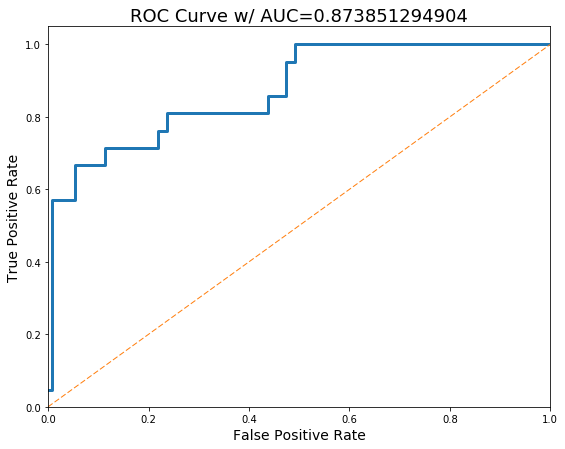

In [29]:
#building the predictive model
cv_folds=5 
early_stopping_rounds=50
alg = optim_model
# loading numpy array into dMatrix
xgb_train = xgb.DMatrix( x_train_s, label=y_train_s)
xgb_test = xgb.DMatrix( x_test, label=y_test)
    
#Train cross validation
xgb_param = alg.get_xgb_params()
cvresult = xgb.cv(xgb_param, xgb_train, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                      metrics = ['logloss'], early_stopping_rounds=early_stopping_rounds)
alg.set_params(n_estimators=cvresult.shape[0])
    
#Fit the algorithm on the data
alg.fit(x_train_s, y_train_s, eval_metric='auc')
#alg.fit(x_train, y_train, eval_metric='logloss')
    
#Predict in training set
y_trpred = alg.predict(x_train_s)
y_trpredprob = alg.predict_proba(x_train_s)[:,1]
    
#Predict in test set
y_pred = alg.predict(x_test)
y_predprob = alg.predict_proba(x_test)[:,1]
    
#Print model report:
print ("\nModel Report")
    
print ("Accuracy (train set): %.4g" % metrics.accuracy_score(y_train_s, y_trpred))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train_s, y_trpredprob))
    
print ("Accuracy (test set): %.4g" % metrics.accuracy_score(y_test, y_pred))
print ("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, y_predprob))    
    
#parte añadida que puede petar
################################################################################
print("Confusion matrix:")
print (metrics.confusion_matrix(y_test, y_pred))
print("Detailed classification report:")
print (metrics.classification_report(y_test, y_pred))
                    
# Computing ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_predprob)

#df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
#x = ggplot(df, aes(x='fpr', y='tpr')) + \
#    geom_line() + \
#    geom_abline(linetype='dashed') + \
#    scale_x_continuous(limits=(0,1)) + \
#    scale_y_continuous(limits=(0,1)) + \
#    xlab('FPR') + \
#    ylab('TPR') + \
#    theme_gray() + \
#    ggtitle("ROC Curve w/ AUC=%s" % str(metrics.auc(fpr,tpr)))

plt.figure(figsize=(9,7))
lw = 3
plt.plot(fpr, tpr, lw=lw)
#         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
            
plt.plot([0, 1], [0, 1], lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
#plt.title('Receiver operating characteristic example')
plt.title("ROC Curve w/ AUC=%s" % str(metrics.auc(fpr,tpr)), fontsize = 18)
#plt.legend(loc="lower right")
#plt.savefig('roc_BUENA2.eps')
plt.show()

#ggsave(x, filename="malaria_roc.png", dpi=600 )
#print(x)

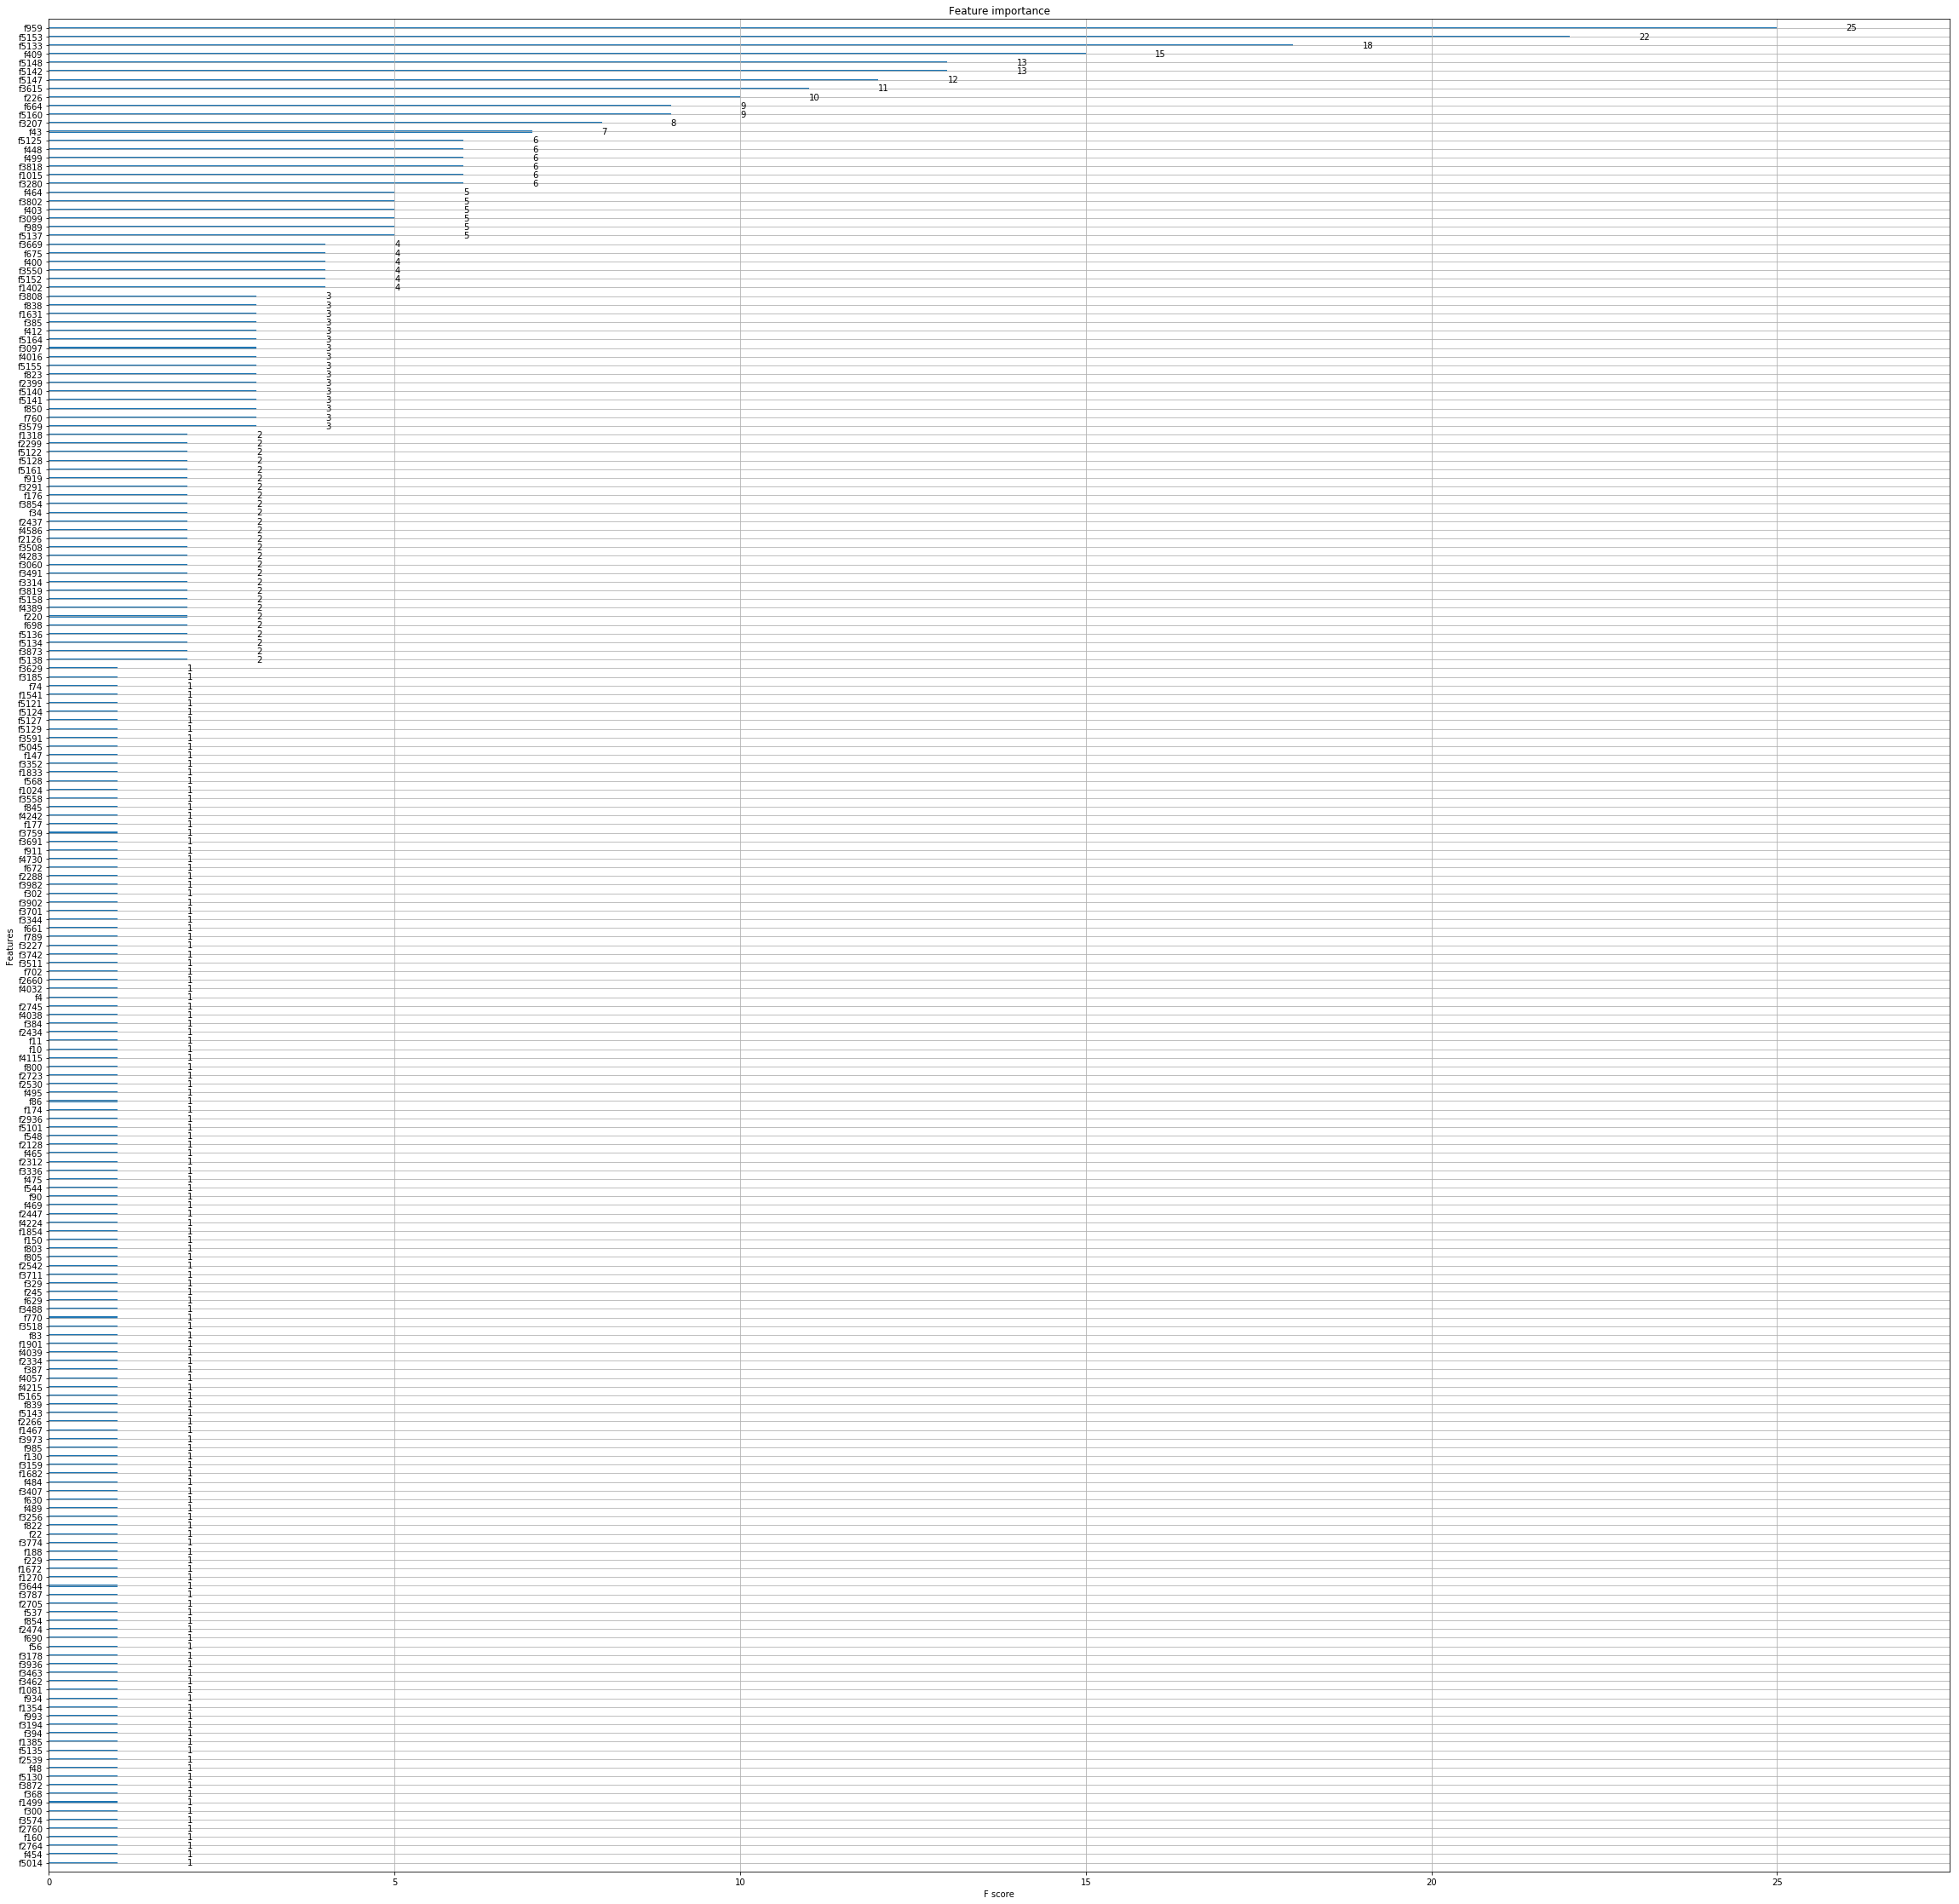

In [30]:
# plot feature importance
plot_importance(alg)
pyplot.show()

In [31]:
#Creating a map of variables to identify the most relevant ones
#Names of the variables
#vars = osm_fp.drop(['ION_ACTIVITY', 'SMILES', 'MOLECULES'], axis=1).columns
vars = osm_fp.drop(['ION_ACTIVITY', 'SMILES'], axis=1).columns
mapping_vars = {}
xgnames = [j + str(i) for i, j in zip(range(len(vars)), ["f"] * len(vars))]
mapping_vars = dict(zip(xgnames, vars))

#Most relevant descriptors

#CAMBIAR ESTO!!!
#for i in ['f34', 'f41', 'f89', 'f50', 'f15','f32', 'f56', 'f18', 'f6', 'f3', 'f38', 'f93',  'f85', 'f21', 'f59' ]:
#    print(mapping_vars[i])

In [32]:
#CAMBIAR EL MODELO ELEGIDO!!!!!

# Fit model using each importance as a threshold
thresholds = np.arange(0.0, 0.030, 0.005)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(alg, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train_s)
    # train model
    #selection_model = XGBClassifier()
    selection_model=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0.2, learning_rate=0.1, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective=u'binary:logistic', reg_alpha=0.1, reg_lambda=1,
       scale_pos_weight=8.26470588235, seed=0, silent=True, subsample=0.9)
    selection_model.fit(select_X_train, y_train_s)
    # eval model
    select_X_test = selection.transform(x_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
    print (metrics.confusion_matrix(y_test, y_pred))


Thresh=0.000, n=5168, Accuracy: 91.85%
[[113   1]
 [ 10  11]]
Thresh=0.005, n=47, Accuracy: 89.63%
[[111   3]
 [ 11  10]]
Thresh=0.010, n=19, Accuracy: 88.15%
[[109   5]
 [ 11  10]]
Thresh=0.015, n=12, Accuracy: 88.89%
[[110   4]
 [ 11  10]]
Thresh=0.020, n=8, Accuracy: 82.22%
[[105   9]
 [ 15   6]]
Thresh=0.025, n=6, Accuracy: 82.96%
[[104  10]
 [ 13   8]]


In [211]:
# CAMBIAR ESTO!!!!
#Definitive model

thresh = 0.005
# select features using threshold
selection = SelectFromModel(alg, threshold=thresh, prefit=True)
select_X_train = selection.transform(x_train_s)
# train model
selection_model = XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0.1, learning_rate=0.3, max_delta_step=0, max_depth=5,
       min_child_weight=3, missing=None, n_estimators=100, nthread=-1,
       objective=u'binary:logistic', reg_alpha=0.1, reg_lambda=1,
       scale_pos_weight=281/34, seed=27, silent=True, subsample=0.9)
selection_model.fit(select_X_train, y_train_s)
# eval model
select_X_test = selection.transform(x_test)
y_pred = selection_model.predict(select_X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
print (metrics.confusion_matrix(y_test, y_pred))

Thresh=0.005, n=88, Accuracy: 91.85%
[[110   4]
 [  7  14]]


# Prediction on the set of marine molecules

In [195]:
# Loading marine molecules list
mm_list = pd.read_csv("marine_molecules.csv", index_col=None, decimal=",", na_values="ND")
mm_list

,NUMBER,S,SMI,SEQUENCE,SMILES
0,#1,S,"3,5-dibromo-4-hydroxybenzaldehyde.smi",SXRHGLQCOLNZPT-UHFFFAOYSA-N,O=Cc1cc(Br)c(O)c(Br)c1
1,#2,S,Alcyopterosin-A.smi,AOZZRIFMYYWXLE-UHFFFAOYSA-N,Cc1cc2c(c(C)c1CCCl)CC(C)(C)C2
2,#3,S,Antarcticoside-D.smi,SFEIVGCFQJAPTI-DCOKEWDMSA-N,COC1C(O)COC(OC[C@@H](C)C/C=C/C(C)[C@H]2C[C@@H]...
3,#4,S,Aplicyanin-A.smi,VVONRGQMZKFFRP-UHFFFAOYSA-N,N=C1NCCC(c2c[nH]c3ccc(Br)cc23)N1
4,#5,S,Asterasterol-C.smi,KDUVNRKZGYTTJS-GACDVITBSA-N,CC(C/C=C/[C@@H](C)[C@H]1CC[C@H]2C3=CC(=O)[C@H]...
5,#7,S,Austrodoral.smi,CNTXEQHESHSVFZ-UBHSHLNASA-N,CC1(C)CCC[C@@]2(C)[C@H]1CC[C@@]2(C)C=O
6,#9,S,Caminatal.smi,JXMWXFSVMMJDHJ-IKERNBKFSA-N,CC(=O)O[C@@H]1C[C@@](C)(C=O)[C@H](CCC(=O)c2ccc...
7,#10,S,Dendrillin.smi,APHPHCFXAWJFAA-AOGFDJAGSA-N,CC(=O)OC1OC(OC(C)=O)C2C1CC[C@H](C1(C)CCCC(C)(C...
8,#11,S,Dendrinolide.smi,IMIAJJXGLPJMII-CEXWTWQISA-N,CC(=O)O[C@H]1OC=C2CC[C@H](/C(C)=C3/CCCC3(C)C)C...
9,#12,S,Discorhabdin-B.smi,SVKKMXJIWIOCJC-VOJFVSQTSA-N,O=C1C=C2S[C@H]3C[C@]2(C=C1Br)C1=C(N3)C(=O)c2[n...


In [196]:
col_f = ['SMILES'] + fp_names
fpd = pd.DataFrame(columns=col_f, index=mm_list.index.values)
fpd = fpd.fillna(0)
fpd.loc[:, "SMILES"] = mm_list.loc[:, "SMILES"]
mrdk_list = smiles_to_rdkit(fpd.loc[:, "SMILES"])
fpd = fpd.assign(MOLECULES=mrdk_list)
list_fpdescriptors = []
for index, row in fpd.iterrows():
    results = {}
    for fp in fp_names:
        results[fp] = fpdict[fp](row["MOLECULES"])
    np_fps = {}
    for key, value in results.iteritems():
        arr = np.zeros((1,))
        if isinstance(value, DataStructs.cDataStructs.ExplicitBitVect):
            DataStructs.ConvertToNumpyArray(value, arr)
        else:
            if isinstance(value, DataStructs.cDataStructs.UIntSparseIntVect):
                fp_bin = DataStructs.cDataStructs.UIntSparseIntVect.ToBinary(value)
            elif isinstance(value, DataStructs.cDataStructs.IntSparseIntVect):
                fp_bin = DataStructs.cDataStructs.IntSparseIntVect.ToBinary(value)
            else:
                fp_bin = DataStructs.cDataStructs.LongSparseIntVect.ToBinary(value)
            fp_frombin = DataStructs.cDataStructs.CreateFromBinaryText(fp_bin)
            DataStructs.ConvertToNumpyArray(fp_frombin, arr)
        np_fps[key] = arr.tolist()
        #morgan_1024 = AllChem.GetMorganFingerprintAsBitVect(row["MOLECULES"], 4, nBits=1024)
        #morgan_2048_1 = AllChem.GetMorganFingerprintAsBitVect(row["MOLECULES"], 1, nBits=2048)
        #morgan_2048_2 = AllChem.GetMorganFingerprintAsBitVect(row["MOLECULES"], 2, nBits=2048)
        #morgan_2048_3 = AllChem.GetMorganFingerprintAsBitVect(row["MOLECULES"], 3, nBits=2048)
        #morgan_2048_4 = AllChem.GetMorganFingerprintAsBitVect(row["MOLECULES"], 4, nBits=2048)
        #morgan_2048_5 = AllChem.GetMorganFingerprintAsBitVect(row["MOLECULES"], 5, nBits=2048)
        #morgan_2048_6 = AllChem.GetMorganFingerprintAsBitVect(row["MOLECULES"], 6, nBits=2048)
        #topological_2048 = AllChem.GetHashedTopologicalTorsionFingerprintAsBitVect(row["MOLECULES"])
        #macc = AllChem.GetMACCSKeysFingerprint(row["MOLECULES"])
        np_fps.update({'SMILES': row["SMILES"], 'MOLECULES': row["MOLECULES"]})
        #fp_descriptors = {'SMILES': row["SMILES"], 'ION_ACTIVITY': row["ION_ACTIVITY"], 'MOLECULES': row["MOLECULES"],
        #                  'MORGAN1024': morgan_1024, 'MORGAN2048_1': morgan_2048_1, 'MORGAN2048_2': morgan_2048_2,
        #                  'MORGAN2048_3': morgan_2048_3, 'MORGAN2048_4': morgan_2048_4, 'MORGAN2048_5': morgan_2048_5,
        #                  'MORGAN2048_6': morgan_2048_6, 'TOPOLOGICAL2048': topological_2048, 'MACCFP': macc}
    list_fpdescriptors.append(np_fps)
fp_df = pd.DataFrame(list_fpdescriptors)
    
    ################################################################
    #inserted 06/06
for index, row in fp_df.iterrows():
    for fp in fp_names:
        ar_val = np.array(fp_df.ix[index, fp])
        fp_df.set_value(index, fp, ar_val)
            
fp_df = fp_df.drop(['MOLECULES'], axis=1)
fp_df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
SMILES    27 non-null object
ecfp6     27 non-null object
fcfp6     27 non-null object
hashap    27 non-null object
hashtt    27 non-null object
maccs     27 non-null object
rdk7      27 non-null object
dtypes: object(7)
memory usage: 1.5+ KB


In [197]:
"""
Spectrophores descriptor calculator.
"""
sp_names = [j+str(i) for i,j in zip(range(1,49),["sp"] * 48)]
#col_s = two + ['SPECTROPHORES'] + sp_names
col_s = ['SMILES'] + sp_names
spd = pd.DataFrame(columns=col_s, index=mm_list.index.values)
spd = spd.fillna(0)
spd.loc[:, "SMILES"] = mm_list.loc[:, "SMILES"]
mpy_list = smiles_to_pybel(spd.loc[:, "SMILES"])
spd = spd.assign(MOLECULES=mpy_list)
    #spd['SPECTROPHORES'] = spd['SPECTROPHORES'].astype(object)
    #list_spdescriptors = []
    
for index, row in spd.iterrows():
    row["MOLECULES"].make3D()
    spectrophore = pybel.ob.OBSpectrophore()
    spectrophore.SetNormalization(spectrophore.NormalizationTowardsZeroMeanAndUnitStd)
    hey = spectrophore.GetSpectrophore(row["MOLECULES"].OBMol)
    sp_descriptors = {n: d for n, d in zip(sp_names, hey)}
        
    for key in sp_descriptors.keys():
        spd.loc[index, key] = sp_descriptors[key]
    
    
spd = spd.dropna(axis=1, how='all')

In [198]:
spd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 50 columns):
SMILES       27 non-null object
sp1          27 non-null float64
sp2          27 non-null float64
sp3          27 non-null float64
sp4          27 non-null float64
sp5          27 non-null float64
sp6          27 non-null float64
sp7          27 non-null float64
sp8          27 non-null float64
sp9          27 non-null float64
sp10         27 non-null float64
sp11         27 non-null float64
sp12         27 non-null float64
sp13         27 non-null float64
sp14         27 non-null float64
sp15         27 non-null float64
sp16         27 non-null float64
sp17         27 non-null float64
sp18         27 non-null float64
sp19         27 non-null float64
sp20         27 non-null float64
sp21         27 non-null float64
sp22         27 non-null float64
sp23         27 non-null float64
sp24         27 non-null float64
sp25         27 non-null float64
sp26         27 non-null float64
sp27   

In [199]:
fp_dfi = fp_individual(fp_df)
fp_dfi = quitar_fps(fp_dfi)

In [190]:
fp_dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 5288 entries, SMILES to fcfp6_125
dtypes: float64(5287), object(1)
memory usage: 1.1+ MB


In [191]:
fs_mm = pd.merge(fp_dfi, spd, how='inner', on='SMILES')

In [200]:
# Checking duplicated rows
#fs_mm = fs_mm.drop_duplicates()
fs_mm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Columns: 5337 entries, SMILES to MOLECULES
dtypes: float64(5335), object(2)
memory usage: 1.1+ MB


In [201]:
fs_mm.head()

,SMILES,rdk7_781,rdk7_830,rdk7_831,rdk7_445,rdk7_444,rdk7_447,rdk7_446,rdk7_441,rdk7_440,...,sp40,sp41,sp42,sp43,sp44,sp45,sp46,sp47,sp48,MOLECULES
0,O=Cc1cc(Br)c(O)c(Br)c1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.873471,-0.637427,-0.510771,-1.059746,1.562034,0.335676,0.055007,0.146336,1.158448,O=Cc1cc(Br)c(O)c(Br)c1\t\n
1,Cc1cc2c(c(C)c1CCCl)CC(C)(C)C2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.108862,-0.503353,-0.835538,-1.507617,1.429696,1.176118,-0.384798,-0.618017,0.643982,Cc1cc2c(c(C)c1CCCl)CC(C)(C)C2\t\n
2,COC1C(O)COC(OC[C@@H](C)C/C=C/C(C)[C@H]2C[C@@H]...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.538717,0.564782,-0.527143,-2.006770,1.276678,1.133807,-0.309944,-0.251214,0.309171,COC1C(O)COC(OC[C@@H](C)C/C=C/C(C)[C@H]2C[C@@H]...
3,N=C1NCCC(c2c[nH]c3ccc(Br)cc23)N1,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.872291,-0.487360,-0.739683,-1.412728,1.369047,0.728912,0.382301,0.124338,0.755899,N=C1NCCC(c2c[nH]c3ccc(Br)cc23)N1\t\n
4,CC(C/C=C/[C@@H](C)[C@H]1CC[C@H]2C3=CC(=O)[C@H]...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.008898,0.688389,-0.468559,-1.397738,1.407325,-0.114066,0.701444,0.447292,1.361934,CC(C/C=C/[C@@H](C)[C@H]1CC[C@H]2C3=CC(=O)[C@H]...


In [202]:
# Converting descriptors dataframe to array and pre-processing
mm_smiles = fs_mm.loc[:,"SMILES"]
mm_array = fs_mm.drop(["SMILES", "MOLECULES"], axis=1).values

In [203]:
mm_array

array([[ 0.        ,  0.        ,  1.        , ...,  0.05500711,
         0.14633556,  1.15844796],
       [ 0.        ,  1.        ,  1.        , ..., -0.38479801,
        -0.61801701,  0.64398191],
       [ 0.        ,  1.        ,  1.        , ..., -0.30994376,
        -0.25121373,  0.3091709 ],
       ..., 
       [ 1.        ,  1.        ,  0.        , ...,  0.54904675,
         0.2124038 ,  0.61638151],
       [ 0.        ,  1.        ,  1.        , ...,  1.03071997,
         1.41540203,  0.78889118],
       [ 1.        ,  1.        ,  1.        , ..., -0.39352265,
        -0.66954562,  1.06830876]])

In [204]:
mm_array = preprocessing.scale(mm_array)

In [213]:
# Predicting marine molecules active against malaria from feature selection model
#Removing descriptors under the importance threshold
#select_X_mm = selection.transform(mm_array)
optim_model.fit(x_train_s, y_train_s, eval_metric='auc')
y_pred_mm = optim_model.predict(mm_array)
mm_pred_df = pd.Series(data=y_pred_mm)



In [215]:
y_predprob_mm = optim_model.predict_proba(mm_array)[:,1]
mm_predprob_df = pd.Series(data=y_predprob_mm)

In [216]:
#Preparing results
mm_results = pd.concat([mm_list, mm_pred_df, mm_predprob_df], axis=1)
mm_results.columns = ['NUMBER', '#', 'NAME', 'INCHI_KEY','SMILES', 'ACTIVITY', 'ACTIVITY_PROBABILITY']
mm_pred_df.value_counts()

0.0    27
dtype: int64

In [219]:
mm_results

,NUMBER,#,NAME,INCHI_KEY,SMILES,ACTIVITY,ACTIVITY_PROBABILITY
0,#1,S,"3,5-dibromo-4-hydroxybenzaldehyde.smi",SXRHGLQCOLNZPT-UHFFFAOYSA-N,O=Cc1cc(Br)c(O)c(Br)c1,0.0,0.004741
1,#2,S,Alcyopterosin-A.smi,AOZZRIFMYYWXLE-UHFFFAOYSA-N,Cc1cc2c(c(C)c1CCCl)CC(C)(C)C2,0.0,0.007260
2,#3,S,Antarcticoside-D.smi,SFEIVGCFQJAPTI-DCOKEWDMSA-N,COC1C(O)COC(OC[C@@H](C)C/C=C/C(C)[C@H]2C[C@@H]...,0.0,0.016883
3,#4,S,Aplicyanin-A.smi,VVONRGQMZKFFRP-UHFFFAOYSA-N,N=C1NCCC(c2c[nH]c3ccc(Br)cc23)N1,0.0,0.006796
4,#5,S,Asterasterol-C.smi,KDUVNRKZGYTTJS-GACDVITBSA-N,CC(C/C=C/[C@@H](C)[C@H]1CC[C@H]2C3=CC(=O)[C@H]...,0.0,0.088182
5,#7,S,Austrodoral.smi,CNTXEQHESHSVFZ-UBHSHLNASA-N,CC1(C)CCC[C@@]2(C)[C@H]1CC[C@@]2(C)C=O,0.0,0.005437
6,#9,S,Caminatal.smi,JXMWXFSVMMJDHJ-IKERNBKFSA-N,CC(=O)O[C@@H]1C[C@@](C)(C=O)[C@H](CCC(=O)c2ccc...,0.0,0.029821
7,#10,S,Dendrillin.smi,APHPHCFXAWJFAA-AOGFDJAGSA-N,CC(=O)OC1OC(OC(C)=O)C2C1CC[C@H](C1(C)CCCC(C)(C...,0.0,0.452354
8,#11,S,Dendrinolide.smi,IMIAJJXGLPJMII-CEXWTWQISA-N,CC(=O)O[C@H]1OC=C2CC[C@H](/C(C)=C3/CCCC3(C)C)C...,0.0,0.012478
9,#12,S,Discorhabdin-B.smi,SVKKMXJIWIOCJC-VOJFVSQTSA-N,O=C1C=C2S[C@H]3C[C@]2(C=C1Br)C1=C(N3)C(=O)c2[n...,0.0,0.013844


In [220]:
mm_results.sort_values('ACTIVITY_PROBABILITY', ascending=False).to_csv("mm_activity_fps.csv")

# Prediction on the set of DrugBank database

In [ ]:
drugbank_list = pd.read_csv("DrugBank_list.csv", index_col=None, decimal=",", na_values="ND", sep=",")
#Dropping NAs from the list (not valid molecules)
drugbank_mod = drugbank_list.dropna()
drugbank_mod2 = drugbank_mod[~drugbank_mod['SMILES'].str.contains('RelatedMol:')]
drugbank_mod2 = drugbank_mod2.reset_index(drop=True)
drugbank_mod2.info()

In [ ]:
col_f = ['SMILES'] + fp_names
fpd = pd.DataFrame(columns=col_f, index=drugbank_mod2.index.values)
fpd = fpd.fillna(0)
fpd.loc[:, "SMILES"] = drugbank_mod2.loc[:, "SMILES"]
mrdk_list = smiles_to_rdkit(fpd.loc[:, "SMILES"])
fpd = fpd.assign(MOLECULES=mrdk_list)
list_fpdescriptors = []
for index, row in fpd.iterrows():
    results = {}
    for fp in fp_names:
        results[fp] = fpdict[fp](row["MOLECULES"])
    np_fps = {}
    for key, value in results.iteritems():
        arr = np.zeros((1,))
        if isinstance(value, DataStructs.cDataStructs.ExplicitBitVect):
            DataStructs.ConvertToNumpyArray(value, arr)
        else:
            if isinstance(value, DataStructs.cDataStructs.UIntSparseIntVect):
                fp_bin = DataStructs.cDataStructs.UIntSparseIntVect.ToBinary(value)
            elif isinstance(value, DataStructs.cDataStructs.IntSparseIntVect):
                fp_bin = DataStructs.cDataStructs.IntSparseIntVect.ToBinary(value)
            else:
                fp_bin = DataStructs.cDataStructs.LongSparseIntVect.ToBinary(value)
            fp_frombin = DataStructs.cDataStructs.CreateFromBinaryText(fp_bin)
            DataStructs.ConvertToNumpyArray(fp_frombin, arr)
        np_fps[key] = arr.tolist()
        #morgan_1024 = AllChem.GetMorganFingerprintAsBitVect(row["MOLECULES"], 4, nBits=1024)
        #morgan_2048_1 = AllChem.GetMorganFingerprintAsBitVect(row["MOLECULES"], 1, nBits=2048)
        #morgan_2048_2 = AllChem.GetMorganFingerprintAsBitVect(row["MOLECULES"], 2, nBits=2048)
        #morgan_2048_3 = AllChem.GetMorganFingerprintAsBitVect(row["MOLECULES"], 3, nBits=2048)
        #morgan_2048_4 = AllChem.GetMorganFingerprintAsBitVect(row["MOLECULES"], 4, nBits=2048)
        #morgan_2048_5 = AllChem.GetMorganFingerprintAsBitVect(row["MOLECULES"], 5, nBits=2048)
        #morgan_2048_6 = AllChem.GetMorganFingerprintAsBitVect(row["MOLECULES"], 6, nBits=2048)
        #topological_2048 = AllChem.GetHashedTopologicalTorsionFingerprintAsBitVect(row["MOLECULES"])
        #macc = AllChem.GetMACCSKeysFingerprint(row["MOLECULES"])
        np_fps.update({'SMILES': row["SMILES"], 'ION_ACTIVITY': row["ION_ACTIVITY"], 'MOLECULES': row["MOLECULES"]})
        #fp_descriptors = {'SMILES': row["SMILES"], 'ION_ACTIVITY': row["ION_ACTIVITY"], 'MOLECULES': row["MOLECULES"],
        #                  'MORGAN1024': morgan_1024, 'MORGAN2048_1': morgan_2048_1, 'MORGAN2048_2': morgan_2048_2,
        #                  'MORGAN2048_3': morgan_2048_3, 'MORGAN2048_4': morgan_2048_4, 'MORGAN2048_5': morgan_2048_5,
        #                  'MORGAN2048_6': morgan_2048_6, 'TOPOLOGICAL2048': topological_2048, 'MACCFP': macc}
    list_fpdescriptors.append(np_fps)
fp_db = pd.DataFrame(list_fpdescriptors)
    
    ################################################################
    #inserted 06/06
for index, row in fp_db.iterrows():
    for fp in fp_names:
        ar_val = np.array(fp_db.ix[index, fp])
        fp_db.set_value(index, fp, ar_val)
            
fp_db = fp_db.drop(['MOLECULES'], axis=1)
fp_db.info()    

In [ ]:
# Checking duplicated rows
fp_db = fp_db.drop_duplicates()


#Check NaN rows and remove
nan_rows = fp_db.index[fp_db.isnull().any(axis=1)]
fp_db_post = fp_db[~fp_db.isnull().any(axis=1)]
fp_db_post = fp_db_post.reset_index(drop=True)

#Removing these rows in the original list
drugbank_mod3 = drugbank_mod2[~fp_db.isnull().any(axis=1)]
drugbank_mod3 = drugbank_mod3.reset_index(drop=True)
fp_db_post.info()
drugbank_mod3.info()

In [ ]:
# Converting descriptors dataframe to array and pre-processing
drugbank_smiles = fp_db_post.loc[:,"SMILES"]
drugbank_array = fp_db_post.drop(['SMILES', 'MOLECULES'], axis=1).values

# Scaling data
drugbank_a_pre = preprocessing.scale(drugbank_array)

In [ ]:
# Predicting DrugBank molecules active against malaria with feature selected model
select_drugbank = selection.transform(drugbank_a_pre)
y_pred_db = selection_model.predict(select_drugbank)

y_predprob_db = selection_model.predict_proba(select_drugbank)[:,1]
db_pred_df = pd.Series(data=y_pred_db)
db_predprob_df = pd.Series(data=y_predprob_db)

drugbank_results = pd.concat([drugbank_mod3, db_pred_df, db_predprob_df], axis=1)
drugbank_results.columns = ['NUMBER', 'S', 'NAME', 'INCHI_KEY','SMILES', 'ACTIVITY_LABEL', 'ACTIVITY_PROBABILITY']
#drugbank_results.to_csv("drugbank_activity.csv")
drugbank_predict_df.value_counts()

In [ ]:
drugbank_results.sort_values('ACTIVITY_PROBABILITY', ascending=False).to_csv("drugbank_activity_sorted.csv")

In [15]:
def spectrophores(df):
    """
    Spectrophores descriptor calculator.
    """
    two = ['SMILES', 'ION_ACTIVITY']
    # sp_names = [j+str(i) for i,j in zip(range(1,49),["sp"] * 48)]
    col_s = two + ['SPECTROPHORES']
    spd = pd.DataFrame(columns=col_s, index=df.index.values)
    spd = spd.fillna(0)
    spd.loc[:, ("SMILES", "ION_ACTIVITY")] = df.loc[:, ("SMILES", "ION_ACTIVITY")]
    mpy_list = smiles_to_pybel(spd.loc[:, "SMILES"])
    spd = spd.assign(MOLECULES=mpy_list)
    spd['SPECTROPHORES'] = spd['SPECTROPHORES'].astype(object)
    #list_spdescriptors = []
    
    #for index, row in spd.iterrows():
    #    row["MOLECULES"].make3D()
    #    spectrophore = pybel.ob.OBSpectrophore()
    #    spectrophore.SetNormalization(spectrophore.NormalizationTowardsZeroMeanAndUnitStd)
    #    hey = spectrophore.GetSpectrophore(row["MOLECULES"].OBMol)
        #row["SPECTROPHORES"] = spectrophores
        #spd.loc[index, "SPECTROPHORES"] = spectrophores
    #    spd.set_value(index, 'SPECTROPHORES', hey)
    
    
    #spd = spd.dropna(axis=1, how='all')
    #spd = spd.drop(['MOLECULES'], axis=1)
    return spd

In [16]:
prueba = spectrophores(osm_cleaned)

In [17]:
prueba

,SMILES,ION_ACTIVITY,SPECTROPHORES,MOLECULES
0,O=C(NC1=CC=NC(C(F)(F)F)=C1)C2=CN=CC3=NN=C(C4=C...,1.0,0,O=C(Nc1ccnc(C(F)(F)F)c1)c1cncc2nnc(c3ccc(OC(F)...
1,O=C(N1CC(C=CC=C2)=C2C1)C3=CN=CC4=NN=C(C5=CC=C(...,0.0,0,O=C(N1Cc2ccccc2C1)c1cncc2nnc(c3ccc(OC(F)F)cc3)...
2,O=C(NC1=C(C)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,0.0,0,O=C(Nc1c(C)c(Cl)ccc1)c1cncc2n1c(nn2)c1ccc(OC(F...
3,c1ncc2n(c1C(Nc1cccc(c1)Cl)=O)c(nn2)c1ccc(cc1)O...,1.0,0,c1ncc2n(c1C(=O)Nc1cccc(c1)Cl)c(nn2)c1ccc(cc1)O...
4,O=C(NC1=C(F)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,0.5,0,O=C(Nc1c(F)c(Cl)ccc1)c1cncc2n1c(nn2)c1ccc(OC(F...
5,FC1=C(F)C=CC(C(OC)COC2=CN=CC3=NN=C(C4=CC=C(C#N...,1.0,0,Fc1c(F)ccc(C(OC)COc2cncc3nnc(c4ccc(C#N)cc4)n23...
6,O=C(NC1=CC(Cl)=CC=C1C)C2=CN=CC(N23)=NN=C3C4=CC...,0.5,0,O=C(Nc1cc(Cl)ccc1C)c1cncc2n1c(nn2)c1ccc(OC(F)F...
7,FC1=C(F)C=CC(CCOC2=CN=CC3=NN=C(C4=CC=C(Cl)C=C4...,1.0,0,Fc1c(F)ccc(CCOc2cncc3nnc(c4ccc(Cl)cc4)n23)c1\t\n
8,OC(C1=CC=CC=C1)COC2=CN=CC3=NN=C(C4=CN=C(C(F)(F...,0.5,0,OC(c1ccccc1)COc1cncc2nnc(c3cnc(C(F)(F)F)cc3)n1...
9,OC(C1=CC=CC=C1)COC2=CN=CC3=NN=C(C4=CC=C(OC(F)F...,1.0,0,OC(c1ccccc1)COc1cncc2nnc(c3ccc(OC(F)F)cc3)n12\t\n


In [27]:
two = ['SMILES', 'ION_ACTIVITY', 'MOLECULES']
two

[u'SMILES', u'ION_ACTIVITY', u'MOLECULES']

In [71]:
col_s = two + ['SPECTROPHORES'] + sp_names
col_s

[u'SMILES',
 u'ION_ACTIVITY',
 u'MOLECULES',
 u'SPECTROPHORES',
 u'sp1',
 u'sp2',
 u'sp3',
 u'sp4',
 u'sp5',
 u'sp6',
 u'sp7',
 u'sp8',
 u'sp9',
 u'sp10',
 u'sp11',
 u'sp12',
 u'sp13',
 u'sp14',
 u'sp15',
 u'sp16',
 u'sp17',
 u'sp18',
 u'sp19',
 u'sp20',
 u'sp21',
 u'sp22',
 u'sp23',
 u'sp24',
 u'sp25',
 u'sp26',
 u'sp27',
 u'sp28',
 u'sp29',
 u'sp30',
 u'sp31',
 u'sp32',
 u'sp33',
 u'sp34',
 u'sp35',
 u'sp36',
 u'sp37',
 u'sp38',
 u'sp39',
 u'sp40',
 u'sp41',
 u'sp42',
 u'sp43',
 u'sp44',
 u'sp45',
 u'sp46',
 u'sp47',
 u'sp48']

In [84]:
spd = pd.DataFrame(columns=col_s, index=osm_cleaned.index.values)
spd

,SMILES,ION_ACTIVITY,MOLECULES,SPECTROPHORES,sp1,sp2,sp3,sp4,sp5,sp6,...,sp39,sp40,sp41,sp42,sp43,sp44,sp45,sp46,sp47,sp48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
spd = spd.fillna(0.)
spd

,SMILES,ION_ACTIVITY,MOLECULES,SPECTROPHORES,sp1,sp2,sp3,sp4,sp5,sp6,...,sp39,sp40,sp41,sp42,sp43,sp44,sp45,sp46,sp47,sp48
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
spd.loc[:, ("SMILES", "ION_ACTIVITY")] = osm_cleaned.loc[:, ("SMILES", "ION_ACTIVITY")]
spd

,SMILES,ION_ACTIVITY,MOLECULES,SPECTROPHORES,sp1,sp2,sp3,sp4,sp5,sp6,...,sp39,sp40,sp41,sp42,sp43,sp44,sp45,sp46,sp47,sp48
0,O=C(NC1=CC=NC(C(F)(F)F)=C1)C2=CN=CC3=NN=C(C4=C...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,O=C(N1CC(C=CC=C2)=C2C1)C3=CN=CC4=NN=C(C5=CC=C(...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,O=C(NC1=C(C)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,c1ncc2n(c1C(Nc1cccc(c1)Cl)=O)c(nn2)c1ccc(cc1)O...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,O=C(NC1=C(F)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,FC1=C(F)C=CC(C(OC)COC2=CN=CC3=NN=C(C4=CC=C(C#N...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,O=C(NC1=CC(Cl)=CC=C1C)C2=CN=CC(N23)=NN=C3C4=CC...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,FC1=C(F)C=CC(CCOC2=CN=CC3=NN=C(C4=CC=C(Cl)C=C4...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,OC(C1=CC=CC=C1)COC2=CN=CC3=NN=C(C4=CN=C(C(F)(F...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,OC(C1=CC=CC=C1)COC2=CN=CC3=NN=C(C4=CC=C(OC(F)F...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
mpy_list = smiles_to_pybel(spd.loc[:, "SMILES"])
mpy_list
spd['MOLECULES'] = spd['MOLECULES'].astype(object)

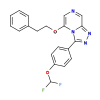

In [88]:
spd = spd.assign(MOLECULES=mpy_list)
spd

spd.loc[17, "MOLECULES"]

In [133]:
spd.loc[3,"SMILES"]

'c1ncc2n(c1C(Nc1cccc(c1)Cl)=O)c(nn2)c1ccc(cc1)OC(F)F'

In [89]:
spd['SPECTROPHORES'] = spd['SPECTROPHORES'].astype(object)

In [115]:
spd_copy = spd.ix[:4,:]
spd_copy

,SMILES,ION_ACTIVITY,MOLECULES,SPECTROPHORES,sp1,sp2,sp3,sp4,sp5,sp6,...,sp39,sp40,sp41,sp42,sp43,sp44,sp45,sp46,sp47,sp48
0,O=C(NC1=CC=NC(C(F)(F)F)=C1)C2=CN=CC3=NN=C(C4=C...,1.0,O=C(Nc1ccnc(C(F)(F)F)c1)c1cncc2nnc(c3ccc(OC(F)...,0,-0.718644,-1.376356,-1.330534,-0.665397,0.627019,0.307890,...,0.458868,0.840345,-0.276614,-0.431357,-1.039670,0.736299,1.344727,0.622650,0.791255,0.185967
1,O=C(N1CC(C=CC=C2)=C2C1)C3=CN=CC4=NN=C(C5=CC=C(...,0.0,O=C(N1Cc2ccccc2C1)c1cncc2nnc(c3ccc(OC(F)F)cc3)...,0,-1.414367,-1.098712,-1.456245,-0.209742,0.229886,1.001397,...,0.084866,0.512695,0.049124,-0.204352,-1.186598,0.397294,0.628195,0.787943,1.197083,1.030319
2,O=C(NC1=C(C)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,0.0,O=C(Nc1c(C)c(Cl)ccc1)c1cncc2n1c(nn2)c1ccc(OC(F...,0,-1.359019,-1.058525,-1.232280,-0.284626,0.025207,1.193461,...,-0.338066,0.358008,0.307062,-0.249856,-1.181217,0.739271,1.060592,0.505590,1.453084,0.484928
3,c1ncc2n(c1C(Nc1cccc(c1)Cl)=O)c(nn2)c1ccc(cc1)O...,1.0,c1ncc2n(c1C(=O)Nc1cccc(c1)Cl)c(nn2)c1ccc(cc1)O...,0,-0.785581,-1.509302,-1.234917,0.267822,0.001118,0.495859,...,0.392669,0.524210,-0.102124,-0.572814,-1.589193,1.100444,1.294051,0.315431,0.640206,0.720372
4,O=C(NC1=C(F)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,0.5,O=C(Nc1c(F)c(Cl)ccc1)c1cncc2n1c(nn2)c1ccc(OC(F...,0,-1.122908,-1.161340,-1.503537,0.149096,-0.304039,0.796860,...,0.039998,0.861357,-0.227042,-0.281615,-1.210493,0.713973,1.256518,0.370173,1.117796,0.467768


In [91]:
for index, row in spd_copy.iterrows():
    row["MOLECULES"].make3D()
    spectrophore = pybel.ob.OBSpectrophore()
    spectrophore.SetNormalization(spectrophore.NormalizationTowardsZeroMeanAndUnitStd)
    hey = spectrophore.GetSpectrophore(row["MOLECULES"].OBMol)
        #row["SPECTROPHORES"] = spectrophores
        #spd.loc[index, "SPECTROPHORES"] = spectrophores
    spd_copy.set_value(index = index, col = 'SPECTROPHORES', value = hey)
    
    
    #spd = spd.dropna(axis=1, how='all')
    #spd = spd.drop(['MOLECULES'], axis=1)

In [92]:
spd_copy.loc[:,('SMILES', 'SPECTROPHORES')]

,SMILES,SPECTROPHORES
0,O=C(NC1=CC=NC(C(F)(F)F)=C1)C2=CN=CC3=NN=C(C4=C...,"(-1.34330512145, -1.40866062757, -1.1397549515..."
1,O=C(N1CC(C=CC=C2)=C2C1)C3=CN=CC4=NN=C(C5=CC=C(...,"(-0.98857002114, -0.759666565133, -0.977885628..."
2,O=C(NC1=C(C)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,"(-0.412745843759, -0.990172544032, -1.18756041..."
3,c1ncc2n(c1C(Nc1cccc(c1)Cl)=O)c(nn2)c1ccc(cc1)O...,"(-1.13369202246, -1.74467061671, -1.0286281872..."
4,O=C(NC1=C(F)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,"(-0.757573947452, -1.14114565796, -1.480420530..."


In [43]:
sp_names = [j+str(i) for i,j in zip(range(1,49),["sp"] * 48)]

In [125]:

for index in spd_copy.index:
    temp = spd_copy.loc[index, "MOLECULES"]
    temp.make3D()
    print(index, temp)
    spectrophore = pybel.ob.OBSpectrophore()
    spectrophore.SetNormalization(spectrophore.NormalizationTowardsZeroMeanAndUnitStd)
    
    hey = spectrophore.GetSpectrophore(temp.OBMol)
        #row["SPECTROPHORES"] = spectrophores
        #spd.loc[index, "SPECTROPHORES"] = spectrophores
        #spd.set_value(index, 'SPECTROPHORES', list(hey))
    
    spd_copy.set_value(index = index, col = 'SPECTROPHORES', value = hey)
    for name,val in zip(sp_names, hey):
        spd_copy.set_value(index, name, val)
    #sp_descriptors = {n: d for n, d in zip(sp_names, hey)}
    #for key, value in sp_descriptors.iteritems():
        #spd.loc[index, key] = sp_descriptors[key]
     #   spd.set_value(index, key, value)

0 O=C(Nc1ccnc(C(F)(F)F)c1)c1cncc2nnc(c3ccc(OC(F)F)cc3)n12	

1 O=C(N1Cc2ccccc2C1)c1cncc2nnc(c3ccc(OC(F)F)cc3)n12	

2 O=C(Nc1c(C)c(Cl)ccc1)c1cncc2n1c(nn2)c1ccc(OC(F)F)cc1	

3 c1ncc2n(c1C(=O)Nc1cccc(c1)Cl)c(nn2)c1ccc(cc1)OC(F)F	

4 O=C(Nc1c(F)c(Cl)ccc1)c1cncc2n1c(nn2)c1ccc(OC(F)F)cc1	



In [128]:
spd.ix[:4,:]
sp_names
spd.columns
spd['sp30']

#print(spd_copy.loc[0, "MOLECULES"])
#print(spd_copy.loc[0, "SPECTROPHORES"])
#print(spd_copy.loc[0,sp_names])
print(spd_copy.loc[0, :])
print(spd_copy.loc[0, "MOLECULES"])
#spd_copy.loc[0, "MOLECULES"].make3D()

SMILES           O=C(NC1=CC=NC(C(F)(F)F)=C1)C2=CN=CC3=NN=C(C4=C...
ION_ACTIVITY                                                     1
MOLECULES        O=C(Nc1ccnc(C(F)(F)F)c1)c1cncc2nnc(c3ccc(OC(F)...
SPECTROPHORES    (-1.24816030571, -1.53365215903, -0.9047953587...
sp1                                                       -1.24816
sp2                                                       -1.53365
sp3                                                      -0.904795
sp4                                                      -0.860426
sp5                                                      -0.126188
sp6                                                       0.170555
sp7                                                      -0.305302
sp8                                                        0.47788
sp9                                                        1.08347
sp10                                                       1.38425
sp11                                                       1.3

In [106]:
#spd.info()
spd_copy.loc[0,"SPECTROPHORES"]
spd_copy
sp_names

[u'sp1',
 u'sp2',
 u'sp3',
 u'sp4',
 u'sp5',
 u'sp6',
 u'sp7',
 u'sp8',
 u'sp9',
 u'sp10',
 u'sp11',
 u'sp12',
 u'sp13',
 u'sp14',
 u'sp15',
 u'sp16',
 u'sp17',
 u'sp18',
 u'sp19',
 u'sp20',
 u'sp21',
 u'sp22',
 u'sp23',
 u'sp24',
 u'sp25',
 u'sp26',
 u'sp27',
 u'sp28',
 u'sp29',
 u'sp30',
 u'sp31',
 u'sp32',
 u'sp33',
 u'sp34',
 u'sp35',
 u'sp36',
 u'sp37',
 u'sp38',
 u'sp39',
 u'sp40',
 u'sp41',
 u'sp42',
 u'sp43',
 u'sp44',
 u'sp45',
 u'sp46',
 u'sp47',
 u'sp48']

In [63]:
v= spd.loc[0,"SPECTROPHORES"]
v
{n: d for n, d in zip(sp_names, v)}

{u'sp1': -1.3201841467663498,
 u'sp10': 1.4208301898246065,
 u'sp11': 1.001852334332603,
 u'sp12': 0.7577612287715654,
 u'sp13': -1.6296631931528207,
 u'sp14': -1.8004759280411353,
 u'sp15': -0.304311700158555,
 u'sp16': -0.27079004219386493,
 u'sp17': -0.14725232339684688,
 u'sp18': 0.1392707564368059,
 u'sp19': -0.5346937824702934,
 u'sp2': -1.471204156048419,
 u'sp20': 1.169652520880926,
 u'sp21': 0.6379009384309232,
 u'sp22': 0.8352684194093071,
 u'sp23': 1.3539224589327088,
 u'sp24': 0.5511718753228472,
 u'sp25': 0.3822920755635297,
 u'sp26': 1.081895631794226,
 u'sp27': 0.5517651523010484,
 u'sp28': 0.745574253484337,
 u'sp29': -0.15508051500281794,
 u'sp3': -0.8374498849441072,
 u'sp30': -0.6297627429442034,
 u'sp31': -1.9651041323441891,
 u'sp32': 0.4083231140383275,
 u'sp33': -0.3270535475751381,
 u'sp34': 0.07193454908773976,
 u'sp35': -1.5398383686690846,
 u'sp36': 1.37505453026622,
 u'sp37': -0.8340208996776258,
 u'sp38': -1.1859801092158915,
 u'sp39': 1.1493664398151877,
 

In [50]:
{n: d for n, d in zip(sp_names, v)}

{u'sp1': -1.3201841467663498,
 u'sp10': 1.4208301898246065,
 u'sp11': 1.001852334332603,
 u'sp12': 0.7577612287715654,
 u'sp13': -1.6296631931528207,
 u'sp14': -1.8004759280411353,
 u'sp15': -0.304311700158555,
 u'sp16': -0.27079004219386493,
 u'sp17': -0.14725232339684688,
 u'sp18': 0.1392707564368059,
 u'sp19': -0.5346937824702934,
 u'sp2': -1.471204156048419,
 u'sp20': 1.169652520880926,
 u'sp21': 0.6379009384309232,
 u'sp22': 0.8352684194093071,
 u'sp23': 1.3539224589327088,
 u'sp24': 0.5511718753228472,
 u'sp25': 0.3822920755635297,
 u'sp26': 1.081895631794226,
 u'sp27': 0.5517651523010484,
 u'sp28': 0.745574253484337,
 u'sp29': -0.15508051500281794,
 u'sp3': -0.8374498849441072,
 u'sp30': -0.6297627429442034,
 u'sp31': -1.9651041323441891,
 u'sp32': 0.4083231140383275,
 u'sp33': -0.3270535475751381,
 u'sp34': 0.07193454908773976,
 u'sp35': -1.5398383686690846,
 u'sp36': 1.37505453026622,
 u'sp37': -0.8340208996776258,
 u'sp38': -1.1859801092158915,
 u'sp39': 1.1493664398151877,
 

In [45]:
spd

,SMILES,ION_ACTIVITY,MOLECULES,SPECTROPHORES,sp37,sp30,sp31,sp48,sp32,sp41,...,sp13,sp10,sp11,sp16,sp17,sp14,sp15,sp34,sp35,sp36
0,O=C(NC1=CC=NC(C(F)(F)F)=C1)C2=CN=CC3=NN=C(C4=C...,1.0,O=C(Nc1ccnc(C(F)(F)F)c1)c1cncc2nnc(c3ccc(OC(F)...,"(-1.32018414677, -1.47120415605, -0.8374498849...",-1.624969,0.245666,-1.347075,0.163663,-0.321238,-0.127861,...,-1.737148,1.102672,1.252239,0.413143,-0.150958,-1.140535,0.327303,0.854288,1.238963,1.291127
1,O=C(N1CC(C=CC=C2)=C2C1)C3=CN=CC4=NN=C(C5=CC=C(...,0.0,O=C(N1Cc2ccccc2C1)c1cncc2nnc(c3ccc(OC(F)F)cc3)...,"(-1.57060876075, -0.828098221775, -1.538599714...",-1.623544,-0.632762,-2.030215,0.880499,0.360190,0.249375,...,-1.555401,1.263799,1.771148,0.432322,-0.511440,-1.885171,-0.034144,0.814783,-1.001922,1.628059
2,O=C(NC1=C(C)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,0.0,O=C(Nc1c(C)c(Cl)ccc1)c1cncc2n1c(nn2)c1ccc(OC(F...,"(-1.14751897373, -1.27889292659, -1.2937868438...",-1.534433,0.279068,-1.582141,0.214783,0.262141,-0.446157,...,-1.906085,0.515897,1.316117,0.670114,-0.024677,-1.778259,0.371060,-0.483271,-1.256793,1.212206
3,c1ncc2n(c1C(Nc1cccc(c1)Cl)=O)c(nn2)c1ccc(cc1)O...,1.0,c1ncc2n(c1C(=O)Nc1cccc(c1)Cl)c(nn2)c1ccc(cc1)O...,"(-1.13369202246, -1.74467061671, -1.0286281872...",-1.567838,-0.748395,-2.117373,0.720372,0.738126,-0.102124,...,-1.710261,1.474731,0.860889,-0.052460,-0.259528,-1.562627,-0.406770,0.294940,-0.425741,1.708689
4,O=C(NC1=C(F)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,0.5,O=C(Nc1c(F)c(Cl)ccc1)c1cncc2n1c(nn2)c1ccc(OC(F...,"(-1.35090286467, -1.38870316939, -1.1778357592...",-1.792170,-0.325798,-1.203232,0.346672,-0.267687,-0.022647,...,-1.667494,1.227552,1.888292,0.434050,0.158389,-1.553806,0.047590,1.129561,1.352764,1.296377
5,FC1=C(F)C=CC(C(OC)COC2=CN=CC3=NN=C(C4=CC=C(C#N...,1.0,Fc1c(F)ccc(C(OC)COc2cncc3nnc(c4ccc(C#N)cc4)n23...,"(-1.33805568475, -1.93417604725, -1.0157781502...",-1.414253,0.910280,-0.915414,1.098160,-0.872827,-0.253618,...,-2.026789,0.916597,1.247025,0.195038,-0.090891,-1.338580,0.145657,1.260291,1.559805,0.721963
6,O=C(NC1=CC(Cl)=CC=C1C)C2=CN=CC(N23)=NN=C3C4=CC...,0.5,O=C(Nc1cc(Cl)ccc1C)c1cncc2n1c(nn2)c1ccc(OC(F)F...,"(-0.0170834400112, -1.28093345098, -1.13518331...",-1.564685,-0.306730,-1.333195,0.936330,-0.257726,0.288915,...,-1.902485,1.244522,1.751027,-0.068674,0.275105,-0.933402,-0.675115,1.150877,1.299016,1.294539
7,FC1=C(F)C=CC(CCOC2=CN=CC3=NN=C(C4=CC=C(Cl)C=C4...,1.0,Fc1c(F)ccc(CCOc2cncc3nnc(c4ccc(Cl)cc4)n23)c1\t\n,"(-1.76426739162, -1.53059979196, -0.8110420146...",-1.500174,0.037034,-1.968514,0.777395,0.427277,-0.314276,...,-1.947256,1.593372,1.516918,0.490331,-0.036599,-1.382416,0.250735,0.066542,-1.082447,1.880253
8,OC(C1=CC=CC=C1)COC2=CN=CC3=NN=C(C4=CN=C(C(F)(F...,0.5,OC(c1ccccc1)COc1cncc2nnc(c3cnc(C(F)(F)F)cc3)n1...,"(-1.05866052355, -1.40071858757, -0.7682064287...",-1.279744,-0.231657,-0.598889,1.265121,0.058244,-0.167148,...,-1.658988,1.101180,1.696456,-0.496225,-0.242898,-1.206540,-0.393534,1.718347,1.359149,0.143559
9,OC(C1=CC=CC=C1)COC2=CN=CC3=NN=C(C4=CC=C(OC(F)F...,1.0,OC(c1ccccc1)COc1cncc2nnc(c3ccc(OC(F)F)cc3)n12\t\n,"(-0.858101589872, -0.698598384063, -0.91627416...",-1.193713,0.517636,-1.841345,0.527704,0.292920,-0.174839,...,-1.965972,1.994471,1.262151,-0.142595,-0.453327,-1.430978,-0.092250,-0.153985,-0.419964,1.719225


In [175]:
spd.ix[0, "SPECTROPHORES"]

(-1.2481603057066522,
 -1.5336521590284058,
 -0.9047953587006033,
 -0.8604260237065928,
 -0.12618779544926392,
 0.17055490380054408,
 -0.3053017566951489,
 0.47788007550263045,
 1.083470730407531,
 1.3842516574261041,
 1.3435926214700116,
 0.5187734106798345,
 -1.7606996942266735,
 -1.1288644219322301,
 0.025877449117365448,
 0.24472079349940834,
 0.0377363390138595,
 0.19779205267146086,
 -1.4468865843044378,
 0.4296107072935767,
 1.399812852826745,
 0.32944407567275746,
 1.4608518822348209,
 0.2106045481333465,
 -1.8485929679220778,
 -0.21053001172369784,
 -0.5333800222115811,
 0.7374725111559375,
 0.14475338479417402,
 0.15726360240410478,
 -1.5792126041987586,
 -0.21440974451479666,
 0.13529209468904554,
 0.6917348851156058,
 0.7836551464270759,
 1.7359537259849673,
 -1.8308074377363834,
 -1.141999841143306,
 0.29867825222326094,
 0.5100277519861534,
 -0.1756439580945099,
 -0.309051388005401,
 -1.28989693740317,
 0.9061877452152288,
 1.5729977438416316,
 0.4334867632849008,
 0.8250

In [67]:
spd.ix[0,sp_names]

sp1     -0.350106
sp2      -1.17844
sp3     -0.945691
sp4      -1.28357
sp5      0.877693
sp6      -0.64775
sp7     -0.834034
sp8      0.533033
sp9      0.371784
sp10      1.73058
sp11      1.14042
sp12     0.586085
sp13     -1.70153
sp14    -0.990873
sp15     0.111604
sp16     0.724043
sp17    -0.343458
sp18    -0.266783
sp19      -1.5877
sp20     0.215462
sp21      1.13554
sp22       0.7936
sp23      1.16292
sp24     0.747173
sp25      -1.3217
sp26     -0.13068
sp27    0.0228321
sp28     0.596719
sp29     0.556453
sp30     -1.02107
sp31     -1.94898
sp32     0.326594
sp33    0.0630867
sp34      0.93187
sp35     0.292705
sp36      1.63217
sp37     -1.78912
sp38     -1.45531
sp39    -0.144502
sp40     0.238928
sp41    0.0439697
sp42   -0.0915744
sp43     -1.09345
sp44     0.389981
sp45      0.92637
sp46     0.886721
sp47      1.50271
sp48     0.585278
Name: 0, dtype: object

In [157]:
fingerprint_desc (osm_cleaned)

,ION_ACTIVITY,SMILES,ecfp0,ecfp2,ecfp4,ecfp6,fcfp2,fcfp4,fcfp6,hashap,hashtt,lecfp4,lecfp6,lfcfp4,lfcfp6,maccs,rdk5,rdk6,rdk7
0,1.0,O=C(NC1=CC=NC(C(F)(F)F)=C1)C2=CN=CC3=NN=C(C4=C...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,0.0,O=C(N1CC(C=CC=C2)=C2C1)C3=CN=CC4=NN=C(C5=CC=C(...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,0.0,O=C(NC1=C(C)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
3,1.0,c1ncc2n(c1C(Nc1cccc(c1)Cl)=O)c(nn2)c1ccc(cc1)O...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
4,0.5,O=C(NC1=C(F)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0,

In [39]:
def fp_individual(df):  
    fp_names_short = ['rdk7', 'rdk5', 'hashtt', 'ecfp6', 'ecfp4', 'ecfp2', 'ecfp0', 'fcfp2', 'fcfp4', 'rdk6', 'fcfp6', 'hashap']
    fp_names_long = ['lfcfp6', 'lfcfp4', 'lecfp4', 'lecfp6']
    fp_names_ss =  ['maccs']
    
    for index, row in df.iterrows():
        for name in fp_names:
            if name in fp_names_short:
                name_fp = [j+"_"+str(i) for i, j in zip(range(1,nbits+1), [name]*(nbits+1))]
            
            elif name in fp_names_long:
                name_fp = [j+"_"+str(i) for i, j in zip(range(1,longbits+1), [name]*(longbits+1))]
            
            else:
                name_fp = [j+"_"+str(i) for i, j in zip(range(1,167+1), [name]*(167+1))]
            hey = df.loc[index, name]
            fps = {n: d for n, d in zip(name_fp, hey)}
            for key in fps.keys():
                df.loc[index, key] = fps[key]
    return df

In [37]:
ey=100
aeiou = ["a", "e", "i", "o", "u"]
for name in aeiou:
    name_fp = [j+"_"+str(i) for i, j in zip(range(1,ey+1), [name]*(ey+1))]
    print(name_fp)

[u'a_1', u'a_2', u'a_3', u'a_4', u'a_5', u'a_6', u'a_7', u'a_8', u'a_9', u'a_10', u'a_11', u'a_12', u'a_13', u'a_14', u'a_15', u'a_16', u'a_17', u'a_18', u'a_19', u'a_20', u'a_21', u'a_22', u'a_23', u'a_24', u'a_25', u'a_26', u'a_27', u'a_28', u'a_29', u'a_30', u'a_31', u'a_32', u'a_33', u'a_34', u'a_35', u'a_36', u'a_37', u'a_38', u'a_39', u'a_40', u'a_41', u'a_42', u'a_43', u'a_44', u'a_45', u'a_46', u'a_47', u'a_48', u'a_49', u'a_50', u'a_51', u'a_52', u'a_53', u'a_54', u'a_55', u'a_56', u'a_57', u'a_58', u'a_59', u'a_60', u'a_61', u'a_62', u'a_63', u'a_64', u'a_65', u'a_66', u'a_67', u'a_68', u'a_69', u'a_70', u'a_71', u'a_72', u'a_73', u'a_74', u'a_75', u'a_76', u'a_77', u'a_78', u'a_79', u'a_80', u'a_81', u'a_82', u'a_83', u'a_84', u'a_85', u'a_86', u'a_87', u'a_88', u'a_89', u'a_90', u'a_91', u'a_92', u'a_93', u'a_94', u'a_95', u'a_96', u'a_97', u'a_98', u'a_99', u'a_100']
[u'e_1', u'e_2', u'e_3', u'e_4', u'e_5', u'e_6', u'e_7', u'e_8', u'e_9', u'e_10', u'e_11', u'e_12', u'e_13'

In [40]:
prueba = fp_individual(osm_fp)
prueba

,ION_ACTIVITY,SMILES,ecfp6,fcfp6,hashap,hashtt,maccs,rdk7,rdk7_781,rdk7_830,...,fcfp6_414,fcfp6_415,fcfp6_416,fcfp6_125,rdk7_1024,maccs_167,hashtt_1024,ecfp6_1024,hashap_1024,fcfp6_1024
0,1.0,O=C(NC1=CC=NC(C(F)(F)F)=C1)C2=CN=CC3=NN=C(C4=C...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,O=C(N1CC(C=CC=C2)=C2C1)C3=CN=CC4=NN=C(C5=CC=C(...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,O=C(NC1=C(C)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,c1ncc2n(c1C(Nc1cccc(c1)Cl)=O)c(nn2)c1ccc(cc1)O...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.5,O=C(NC1=C(F)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,FC1=C(F)C=CC(C(OC)COC2=CN=CC3=NN=C(C4=CC=C(C#N...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...",1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.5,O=C(NC1=CC(Cl)=CC=C1C)C2=CN=CC(N23)=NN=C3C4=CC...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,1.0,FC1=C(F)C=CC(CCOC2=CN=CC3=NN=C(C4=CC=C(Cl)C=C4...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...",1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.5,OC(C1=CC=CC=C1)COC2=CN=CC3=NN=C(C4=CN=C(C(F)(F...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...",1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,OC(C1=CC=CC=C1)COC2=CN=CC3=N

[ 1.  1.  1. ...,  0.  0.  0.]


1024

In [1]:
4+4

8

0.0

0.0

1.0

In [45]:
prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Columns: 5295 entries, ION_ACTIVITY to fcfp6_1024
dtypes: float64(5288), object(7)
memory usage: 18.4+ MB


In [47]:
for i in prueba.columns:
    print(i)

ION_ACTIVITY
SMILES
ecfp6
fcfp6
hashap
hashtt
maccs
rdk7
rdk7_781
rdk7_830
rdk7_831
rdk7_445
rdk7_444
rdk7_447
rdk7_446
rdk7_441
rdk7_440
rdk7_443
rdk7_442
rdk7_724
rdk7_725
rdk7_726
rdk7_727
rdk7_449
rdk7_448
rdk7_722
rdk7_723
rdk7_688
rdk7_579
rdk7_578
rdk7_1018
rdk7_1019
rdk7_1016
rdk7_1017
rdk7_1014
rdk7_1015
rdk7_1012
rdk7_1013
rdk7_371
rdk7_1011
rdk7_805
rdk7_368
rdk7_369
rdk7_804
rdk7_364
rdk7_365
rdk7_366
rdk7_367
rdk7_360
rdk7_361
rdk7_362
rdk7_363
rdk7_243
rdk7_242
rdk7_241
rdk7_240
rdk7_247
rdk7_246
rdk7_245
rdk7_244
rdk7_531
rdk7_530
rdk7_249
rdk7_248
rdk7_535
rdk7_534
rdk7_537
rdk7_536
rdk7_430
rdk7_431
rdk7_432
rdk7_433
rdk7_434
rdk7_435
rdk7_436
rdk7_437
rdk7_438
rdk7_439
rdk7_843
rdk7_802
rdk7_845
rdk7_844
rdk7_847
rdk7_846
rdk7_39
rdk7_38
rdk7_35
rdk7_34
rdk7_37
rdk7_36
rdk7_31
rdk7_30
rdk7_33
rdk7_32
rdk7_808
rdk7_1022
rdk7_937
rdk7_720
rdk7_721
rdk7_870
rdk7_927
rdk7_807
rdk7_538
rdk7_871
rdk7_669
rdk7_668
rdk7_953
rdk7_665
rdk7_664
rdk7_667
rdk7_666
rdk7_661
rdk7_66

hashtt_712
hashtt_750
hashtt_429
hashtt_428
hashtt_544
hashtt_545
hashtt_542
hashtt_543
hashtt_540
hashtt_312
hashtt_421
hashtt_420
hashtt_423
hashtt_422
hashtt_425
hashtt_311
hashtt_427
hashtt_426
hashtt_845
hashtt_975
hashtt_310
hashtt_875
hashtt_693
hashtt_759
hashtt_758
hashtt_701
hashtt_314
hashtt_790
hashtt_700
hashtt_954
hashtt_88
hashtt_89
hashtt_86
hashtt_87
hashtt_84
hashtt_85
hashtt_82
hashtt_83
hashtt_80
hashtt_81
hashtt_887
hashtt_886
hashtt_885
hashtt_251
hashtt_883
hashtt_882
hashtt_881
hashtt_880
hashtt_702
hashtt_704
hashtt_944
hashtt_889
hashtt_257
hashtt_706
hashtt_707
hashtt_869
hashtt_868
hashtt_904
hashtt_905
hashtt_9
hashtt_8
hashtt_703
hashtt_901
hashtt_5
hashtt_4
hashtt_7
hashtt_6
hashtt_1
hashtt_640
hashtt_3
hashtt_2
hashtt_164
hashtt_165
hashtt_166
hashtt_167
hashtt_160
hashtt_161
hashtt_162
hashtt_163
hashtt_168
hashtt_169
hashtt_39
hashtt_38
hashtt_896
hashtt_33
hashtt_32
hashtt_31
hashtt_30
hashtt_37
hashtt_36
hashtt_35
hashtt_34
hashtt_1021
hashtt_843
has

hashap_974
hashap_860
hashap_268
hashap_269
hashap_861
hashap_430
hashap_260
hashap_261
hashap_262
hashap_263
hashap_264
hashap_265
hashap_266
hashap_267
hashap_303
hashap_302
hashap_301
hashap_300
hashap_307
hashap_306
hashap_305
hashap_304
hashap_422
hashap_435
hashap_309
hashap_308
hashap_434
hashap_437
hashap_436
hashap_844
hashap_845
hashap_846
hashap_847
hashap_840
hashap_841
hashap_423
hashap_843
hashap_848
hashap_849
hashap_910
hashap_466
hashap_467
hashap_748
hashap_464
hashap_739
hashap_76
hashap_77
hashap_74
hashap_75
hashap_72
hashap_73
hashap_70
hashap_71
hashap_462
hashap_951
hashap_78
hashap_79
hashap_167
hashap_166
hashap_165
hashap_164
hashap_163
hashap_162
hashap_161
hashap_160
hashap_606
hashap_607
hashap_604
hashap_461
hashap_602
hashap_603
hashap_169
hashap_168
hashap_761
hashap_760
hashap_763
hashap_762
hashap_765
hashap_764
hashap_767
hashap_766
hashap_769
hashap_768
hashap_426
hashap_545
hashap_835
hashap_544
hashap_1020
hashap_901
hashap_1022
hashap_1023
hashap

In [50]:
def quitar_fps(df):
    fp_df = df.drop(fp_names, axis=1)
    return fp_df

In [51]:
prueba2 = quitar_fps(prueba)

In [52]:
prueba2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Columns: 5289 entries, ION_ACTIVITY to fcfp6_1024
dtypes: float64(5288), object(1)
memory usage: 18.4+ MB


In [53]:
for i in prueba2.columns:
    print(i)

ION_ACTIVITY
SMILES
rdk7_781
rdk7_830
rdk7_831
rdk7_445
rdk7_444
rdk7_447
rdk7_446
rdk7_441
rdk7_440
rdk7_443
rdk7_442
rdk7_724
rdk7_725
rdk7_726
rdk7_727
rdk7_449
rdk7_448
rdk7_722
rdk7_723
rdk7_688
rdk7_579
rdk7_578
rdk7_1018
rdk7_1019
rdk7_1016
rdk7_1017
rdk7_1014
rdk7_1015
rdk7_1012
rdk7_1013
rdk7_371
rdk7_1011
rdk7_805
rdk7_368
rdk7_369
rdk7_804
rdk7_364
rdk7_365
rdk7_366
rdk7_367
rdk7_360
rdk7_361
rdk7_362
rdk7_363
rdk7_243
rdk7_242
rdk7_241
rdk7_240
rdk7_247
rdk7_246
rdk7_245
rdk7_244
rdk7_531
rdk7_530
rdk7_249
rdk7_248
rdk7_535
rdk7_534
rdk7_537
rdk7_536
rdk7_430
rdk7_431
rdk7_432
rdk7_433
rdk7_434
rdk7_435
rdk7_436
rdk7_437
rdk7_438
rdk7_439
rdk7_843
rdk7_802
rdk7_845
rdk7_844
rdk7_847
rdk7_846
rdk7_39
rdk7_38
rdk7_35
rdk7_34
rdk7_37
rdk7_36
rdk7_31
rdk7_30
rdk7_33
rdk7_32
rdk7_808
rdk7_1022
rdk7_937
rdk7_720
rdk7_721
rdk7_870
rdk7_927
rdk7_807
rdk7_538
rdk7_871
rdk7_669
rdk7_668
rdk7_953
rdk7_665
rdk7_664
rdk7_667
rdk7_666
rdk7_661
rdk7_660
rdk7_663
rdk7_662
rdk7_104
rdk7_105

hashtt_34
hashtt_1021
hashtt_843
hashtt_1020
hashtt_763
hashtt_348
hashtt_349
hashtt_705
hashtt_903
hashtt_340
hashtt_341
hashtt_342
hashtt_343
hashtt_344
hashtt_345
hashtt_346
hashtt_347
hashtt_263
hashtt_262
hashtt_261
hashtt_260
hashtt_267
hashtt_266
hashtt_265
hashtt_264
hashtt_269
hashtt_268
hashtt_760
hashtt_841
hashtt_942
hashtt_943
hashtt_940
hashtt_941
hashtt_920
hashtt_946
hashtt_840
hashtt_947
hashtt_582
hashtt_583
hashtt_580
hashtt_581
hashtt_586
hashtt_587
hashtt_584
hashtt_585
hashtt_588
hashtt_589
hashtt_465
hashtt_464
hashtt_467
hashtt_466
hashtt_461
hashtt_460
hashtt_463
hashtt_462
hashtt_744
hashtt_745
hashtt_746
hashtt_747
hashtt_469
hashtt_468
hashtt_742
hashtt_743
hashtt_602
hashtt_710
hashtt_973
hashtt_972
hashtt_871
hashtt_878
hashtt_879
hashtt_977
hashtt_976
hashtt_519
hashtt_518
hashtt_791
hashtt_876
hashtt_511
hashtt_510
hashtt_513
hashtt_512
hashtt_515
hashtt_514
hashtt_517
hashtt_516
hashtt_872
hashtt_765
hashtt_873
hashtt_870
hashtt_120
hashtt_121
hashtt_12

hashap_490
hashap_497
hashap_496
hashap_495
hashap_494
hashap_862
hashap_863
hashap_974
hashap_860
hashap_268
hashap_269
hashap_861
hashap_430
hashap_260
hashap_261
hashap_262
hashap_263
hashap_264
hashap_265
hashap_266
hashap_267
hashap_303
hashap_302
hashap_301
hashap_300
hashap_307
hashap_306
hashap_305
hashap_304
hashap_422
hashap_435
hashap_309
hashap_308
hashap_434
hashap_437
hashap_436
hashap_844
hashap_845
hashap_846
hashap_847
hashap_840
hashap_841
hashap_423
hashap_843
hashap_848
hashap_849
hashap_910
hashap_466
hashap_467
hashap_748
hashap_464
hashap_739
hashap_76
hashap_77
hashap_74
hashap_75
hashap_72
hashap_73
hashap_70
hashap_71
hashap_462
hashap_951
hashap_78
hashap_79
hashap_167
hashap_166
hashap_165
hashap_164
hashap_163
hashap_162
hashap_161
hashap_160
hashap_606
hashap_607
hashap_604
hashap_461
hashap_602
hashap_603
hashap_169
hashap_168
hashap_761
hashap_760
hashap_763
hashap_762
hashap_765
hashap_764
hashap_767
hashap_766
hashap_769
hashap_768
hashap_426
hashap_54